## Assessed Task 2: Penguin Species Classification

For this assignment, you will be using the "Penguin" dataset. This dataset contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica. The dataset consists of 7 columns, 3 of them contain categorical features and 4 of them numerical features:

* species: penguin species (Chinstrap, Adélie, or Gentoo)

* culmen_length_mm: culmen length (mm)

* culmen_depth_mm: culmen depth (mm)

* flipper_length_mm: flipper length (mm)

* body_mass_g: body mass (g)

* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

* sex: penguin sex

The task is to predict the species (target) using the featues above and a number of different machine learning algorithm (KNN classifier, support vector machine, decision tree classifier, and random forrest classifier). 

What is culmen?
The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

![Penguin](culmen.png)

<center>Source: https://allisonhorst.github.io/palmerpenguins/</center>

This assessed task is worth 10 marks and consists of 16 tasks. For each task, marks will be awarded for the output and for the quality of code (the code does what it should; follows a consistent style, and is easy to understand).

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


/Users/macos/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("data/penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Handling Missing Data

***Task 1:*** Detect and summarise all missing values and display them as illustrated below. [0.25 mark]

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

***Task 2:*** Replace missing values by the mean in the case of numerical features and by the mode in the case of categorical features, and then display again the summary of missing values as illustrated below. [1 mark]

There are 5 columns having missing values: `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` and `sex`. As these features `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` are numerical, the missing value will be replaced by the mean. `sex` is categorical fetures so the missing values will be replaced by the mode.

In [6]:
# Replace missing values by the mean for numerical features
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

# Replace missing values by the mode for categorical features
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Show the summary of missing values again:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Analyzing the Data

***Task 3:*** Display the pairwise correlation of all columns in the dataframe. [0.25 mark]

In [7]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


***Task 4:*** Generate plots for the correlations between all numerical features/columns with a scatter matrix. [0.5 mark]

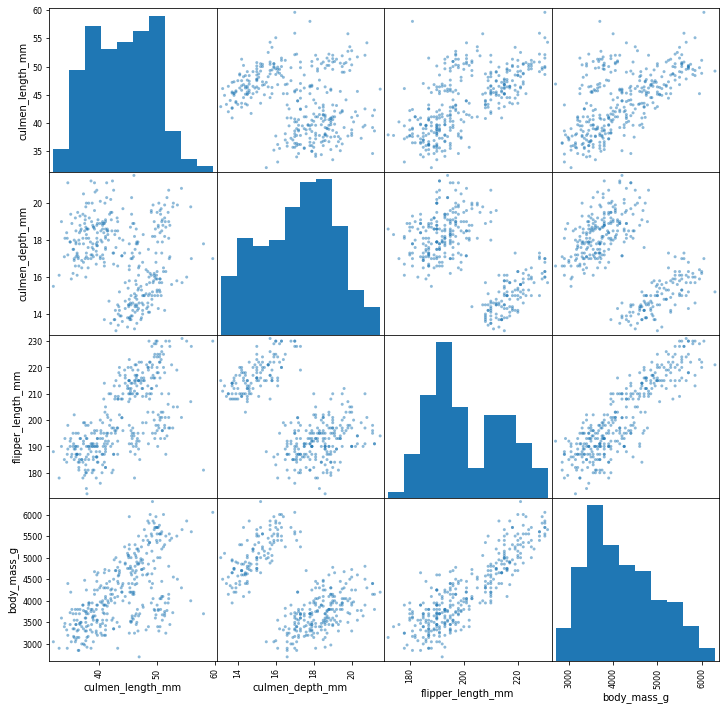

In [8]:
# Select only the numerical columns for the scatter matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a scatter matrix
scatter_matrix(numerical_columns, figsize=(12, 12), diagonal='hist')
plt.show()

***Task 5:*** Produce a scatter plot that shows the relationship between body mass and flipper length as illustrated below. [0.5 mark]

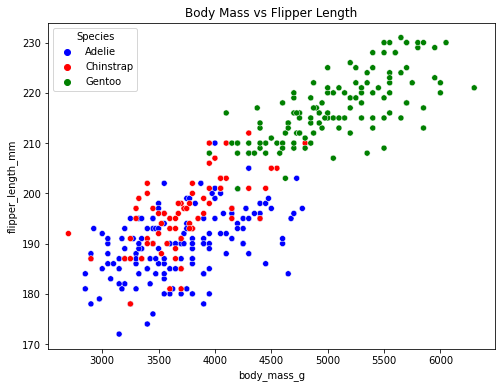

In [9]:
# Define colors for each species
colors = {'Adelie': 'blue', 'Chinstrap': 'red', 'Gentoo': 'green'}

# Create a scatter plot with seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['body_mass_g'],
    y=df['flipper_length_mm'],
    hue=df['species'],
    palette=colors,
)

# Add labels and legend
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')
plt.title('Body Mass vs Flipper Length')
plt.legend(title='Species', loc='upper left')

# Show the plot
plt.show()


***Task 6:*** Display value counts for the categorical features species, island and sex. [0.75 mark]

In [10]:
# Display value counts for the "species" column
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [11]:
# Display value counts for the "island" column
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [12]:
# Display value counts for the "sex" column
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

***Task 7:*** Explore where the full stop comes from in feature sex, display the corresponding row, replace the full stop by 'FEMALE', and then display the modified row again. [0.25 mark]

In [13]:
# Find rows with a full stop ('.') in the 'sex' column and display
df[df['sex'] == '.']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
# Replace the full stop with 'FEMALE'
df['sex'].replace('.', 'FEMALE', inplace=True)

# Display te modified row
df.iloc[336:337]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,FEMALE


***Task 8:*** Apply one hot encoding to the categorical features 'sex' and 'island' and display the head of the resulting dataframe as illustrated below. [0.5 mark] 

In [15]:
# Create dummy variables for 'sex' and 'island' columns
sex_dummies = pd.get_dummies(df['sex'], prefix='sex', prefix_sep='_')
island_dummies = pd.get_dummies(df['island'], prefix='island', prefix_sep='_')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, sex_dummies, island_dummies], axis=1)

# Display the head of the resulting DataFrame
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,0,1,0,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,1,0,0,0,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,1,0,0,0,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,0,1,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE,0,1,1,0,0
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE,1,0,1,0,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE,0,1,1,0,0
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE,1,0,1,0,0


***Task 9:*** Use label encoding ({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}) for the target variable ('species') and display the resulting dataframe as displayed below. [0.5 mark]

In [16]:
# Display dataframe
print(df.dtypes)

# Define the label encoding mapping
label_encoding = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

# Apply label encoding to the 'species' column
df['species'] = df['species'].map(label_encoding)

# Display the resulting dataframe
print(df.dtypes)

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
sex_FEMALE             uint8
sex_MALE               uint8
island_Biscoe          uint8
island_Dream           uint8
island_Torgersen       uint8
dtype: object
species                int64
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
sex_FEMALE             uint8
sex_MALE               uint8
island_Biscoe          uint8
island_Dream           uint8
island_Torgersen       uint8
dtype: object


## Machine Learning Algorithms

***Task 10:*** Use the train_test_split function of the sklearn library and split the independent variables and the target variable ('species') into a training set (80%) and into a test set (20%) and use random_state = 100 to make the solution reproducible. [0.5 mark]

In [17]:
# Define the independent variables (features) and the target variable
X = df.drop(['species', 'island', 'sex'], axis=1) # Independent variables
y = df['species']  # Target variable

# Split the data into a training set (80%) and a test set (20%) with random_state=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

***Task 11:*** Use the KNeighborsClassifier (n_neighbors = 6) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [18]:
# Create the KNeighborsClassifier with n_neighbors = 6
knn_classifier = KNeighborsClassifier(n_neighbors=6)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate and display the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score of knn_classifier:", accuracy_knn)

Accuracy Score of knn_classifier: 0.782608695652174


***Task 12:*** Use GridSearchCV function (with cv = 5) of the sklearn library and find the best value for the neighbors in the range from 1 to 20 for the KNeighborsClassifier and display the best value. [0.5 mark]

In [19]:
# Define the parameter grid for grid search
param_grid = {'n_neighbors': range(1, 21)}  # Values from 1 to 20 for n_neighbors

# Create the GridSearchCV object with cv=5
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best value for n_neighbors
best_neighbors = grid_search.best_params_['n_neighbors']
print("Best value for n_neighbors:", best_neighbors)

Best value for n_neighbors: 9


***Task 13:*** Use the SVC() classifier (with the parameters: kernel='poly', random_state=100), fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [20]:
# Create the SVC classifier with kernel='poly' and random_state=100
svc_classifier = SVC(kernel='poly', random_state=100)

# Fit the model on the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_classifier.predict(X_test)

# Calculate and display the accuracy score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy Score of svc_classifier:", accuracy_svc)

Accuracy Score of svc_classifier: 0.7391304347826086


***Task 14:*** Use the DecisionTreeClassifier (with the parameter: random_state=100) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [21]:
# Create the DecisionTreeClassifier with random_state=100
tree_classifier = DecisionTreeClassifier(random_state=100)

# Fit the model on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = tree_classifier.predict(X_test)

# Calculate and display the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Score of tree_classifier:", accuracy_dt)

Accuracy Score of tree_classifier: 0.9710144927536232


***Task 15:*** Use the RadomForestClassifier (with the parameter: n_estimators=100 and random_state=100) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [22]:
# Create the RandomForestClassifier with n_estimators=100 and random_state=100
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and display the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score of rf_classifier:", accuracy_rf)

Accuracy Score of rf_classifier: 0.9855072463768116


***Task 16***: Now use the StandardScaler of the sklearn library and scale the independent variables and train and test the four ML models (kNN, SVC, Decision tree, and decision forest) again on the data with scaled features (again use 80% of the data for training set and 20% for test set with random seed of 100). Describe and discuss in a "markdown" cell in no more than 150 words what different results you observe. [2.5 marks]

In [23]:
# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the kNN classifier with scaled features
knn_classifier.fit(X_train_scaled, y_train)
y_pred_sc_knn = knn_classifier.predict(X_test_scaled)

# Train the SVC classifier with scaled features
svc_classifier.fit(X_train_scaled, y_train)
y_pred_sc_svc = svc_classifier.predict(X_test_scaled)

# Train the Decision Tree classifier with scaled features
tree_classifier.fit(X_train_scaled, y_train)
y_pred_sc_tree = tree_classifier.predict(X_test_scaled)

# Train the Random Forest classifier with scaled features
rf_classifier.fit(X_train_scaled, y_train)
y_pred_sc_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy scores
accuracy_knn_sc = accuracy_score(y_test, y_pred_sc_knn)
accuracy_svc_sc= accuracy_score(y_test, y_pred_sc_svc)
accuracy_dt_sc= accuracy_score(y_test, y_pred_sc_tree)
accuracy_rf_sc= accuracy_score(y_test, y_pred_sc_rf)

In [24]:
# Define the accuracy scores
models = ['kNN', 'SVC', 'Decision Tree', 'Random Forest']
accuracy_original = [accuracy_knn, accuracy_svc, accuracy_dt, accuracy_rf]
accuracy_scaled = [accuracy_knn_sc, accuracy_svc_sc, accuracy_dt_sc, accuracy_rf_sc]

# Create a DataFrame to display the accuracy scores
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy (Original)': accuracy_original,
    'Accuracy (Scaled)': accuracy_scaled
})

# Display the DataFrame
accuracy_df

,Model,Accuracy (Original),Accuracy (Scaled)
0,kNN,0.782609,1.000000
1,SVC,0.739130,1.000000
2,Decision Tree,0.971014,0.971014
3,Random Forest,0.985507,0.985507


#### Conclusion:

Scaling the dataset significantly improved k-Nearest Neighbors (kNN) and Support Vector Classifier (SVC) accuracy from 0.782609 and 0.739130, respectively to a perfect 1.0. This can be explained that scaling may have a significant impact on kNN. The algorithm relies on distances between data points, so scaling can lead to more accurate results. Similarly, SVC can also benefit from scaling. Scaling ensures that all features have a similar influence on the decision boundary. 

In contrast, Decision Tree and Random Forest models, which are less sensitive to feature scaling, maintained their high accuracy scores 0.971014 and 0.985507 accordingly even without scaling. Decision Trees are not affected by feature scaling since they make decisions based on feature thresholds. Random Forests, like Decision Trees, are not sensitive to feature scaling. Therefore, scaling may not have a substantial impact on Decision Tree and Random Forest accuracy. 